# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 4.1 Гипотеза. Проверить в одинаковых ли строках отсутствуют значения**

In [5]:
print (data.loc[(data['days_employed'].isna()) & (data['total_income'].isna())])

       children  days_employed  dob_years education  education_id  \
12            0            NaN         65   среднее             1   
26            0            NaN         41   среднее             1   
29            0            NaN         63   среднее             1   
41            0            NaN         50   среднее             1   
55            0            NaN         54   среднее             1   
...         ...            ...        ...       ...           ...   
21489         2            NaN         47   Среднее             1   
21495         1            NaN         50   среднее             1   
21497         0            NaN         48    ВЫСШЕЕ             0   
21502         1            NaN         42   среднее             1   
21510         2            NaN         28   среднее             1   

               family_status  family_status_id gender  income_type  debt  \
12          гражданский брак                 1      M    пенсионер     0   
26           женат 

Вывод - отсутствующие данные в одних и тех же строках.

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

Перебираем датасет по каждому уникальному значению 'income_type' и при соответствующем значении 'income_type' и пропуске в 'total_income', пропуск заменяется медианным значением 'total_income'для группы соответствующей группы 'income_type'

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

In [24]:
# Проверяем данные в столбце задолженности
data['debt'].unique()
# ответ - 0, 1 (int) - все в порядке

array([0, 1], dtype=int64)

In [25]:
# Выведем среднюю величину непогашенной вовремя задолженности в процентах
print (data['debt'].sum()/21525 * 100)

8.046457607433217


In [26]:
# Проверяем общее количество записей по каждому значению 'children'

kids_count = data.groupby('children')['debt'].count()
kids_count

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64

In [27]:
data['debt'].sum()

1732

In [28]:
# Далее рассчитываем процент задержек на каждое количество детей
kids_data = data.groupby('children')['debt'].sum() / data.groupby('children')['debt'].count()
kids_stat = range(6)
kids_data

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

In [29]:
# И дополнительно посмотрим соотношение результатов относительно группы "0 детей", как самой большой 
# по чистенности и с наименьшим относительным количеством задержек по кредиту. Т.к. базовая величина для сравнения минимальна,
# то на мой взгляд сравнивать удобно в величинах больше 100%
# Результат для 5 детей отбрасываем, т.к. количество таких случаев крайне мало в датасете(0,0413%)

ratio = []
for i in range(len(kids_data)):
    ratio.append(kids_data[i]/kids_data[0]*100)
ratio

[100.0,
 122.41286472999688,
 125.32361791905286,
 108.45719661335842,
 129.32565449831358,
 0.0]

In [30]:
columns = ['parameter\Число детей', 0, 1, 2, 3, 4, 5]
dataframe1 = ['Количество', 14091, 4808, 2052, 330, 41, 9], ['% задержек', 7.54, 9.23, 9.45, 8.18, 9.75, 0], ['Сравнение, %',100, 122.4, 125.3, 108.45, 129.32]
pd.DataFrame(data = dataframe1, columns = columns)



,parameter\Число детей,0,1,2,3,4,5
0,Количество,14091.00,4808.00,2052.00,330.00,41.00,9.0
1,% задержек,7.54,9.23,9.45,8.18,9.75,0.0
2,"Сравнение, %",100.00,122.40,125.30,108.45,129.32,NaN


<div class="alert alert-warning">
    
**Артём:** 👉 Так лучше не делать. На случай изменения датасета, лучше работать с переменными.

</div>

In [31]:
# Повторил таблицу через pivot_table. Для меня для красоты оформления остались следующие вопросы:
# 1. как округлить вывод думя знаками и сразу прицепить знак "%"
# 2. Как поменять название столбцов в выводе?

data_pivot = data.pivot_table(index=['children'], values = 'debt',aggfunc=['sum', 'count'])
data_pivot['% задержек'] = data_pivot['sum'] / data_pivot['count'] * 100
data_pivot['Сравнение, %'] = data_pivot['% задержек'] / data_pivot['% задержек'][0]*100
data_pivot

,sum,count,% задержек,"Сравнение, %"
,debt,debt,,
children,,,,
0,1063,14091,7.543822,100.000000
1,444,4808,9.234609,122.412865
2,194,2052,9.454191,125.323618
3,27,330,8.181818,108.457197
4,4,41,9.756098,129.325654
5,0,9,0.000000,0.000000


In [32]:
data_pivot1 = data.pivot_table(index=['children'], columns='family_status', values = 'debt',aggfunc=['count', 'sum'])
data_pivot1 = data_pivot1['sum'] / data_pivot1['count'] * 100
data_pivot1

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
children,,,,,
0,9.283820,7.015306,6.257379,8.388278,6.909480
1,11.581292,6.730769,9.090909,11.859296,8.268908
2,12.000000,8.641975,15.000000,8.746356,9.458578
3,12.500000,9.090909,0.000000,14.285714,6.827309
4,50.000000,0.000000,0.000000,0.000000,10.344828
5,NaN,NaN,NaN,0.000000,0.000000


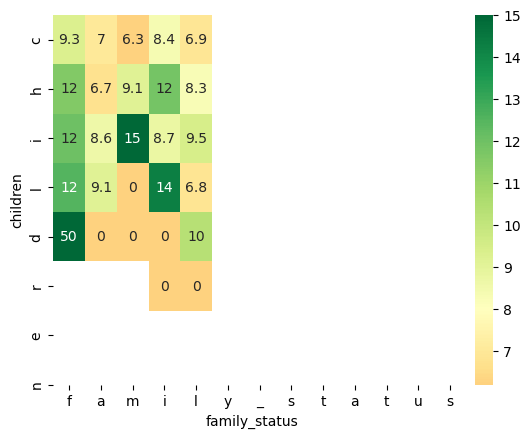

In [33]:
import seaborn
seaborn.heatmap(data_pivot1, xticklabels='family_status', yticklabels='children', annot=True, 
                vmin=6.2, vmax=15, center= 8, cmap='RdYlGn');

#### **Вывод:** 
Заемщики без детей показывают самый низкий процент задержки выплат. Наличие детей увеличивает вероятность задержки выплаты в среднем на 20%.
Данные для заемщиков с 4-5 детьми не стоит учитывать из-за очень малого объема данных.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [34]:
# Проверяем общее количество записей по каждому значению 'family_status'
family_count = data.groupby('family_status')['debt'].count()
family_count

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: debt, dtype: int64

In [35]:
# Далее рассчитываем процент задержек на каждый тип семейного положения, создаем список Семейных положений
family_data = data.groupby('family_status')['debt'].sum() / data.groupby('family_status')['debt'].count()
family_stat = data['family_status'].sort_values().unique()
family_data

family_status
Не женат / не замужем    0.097639
в разводе                0.070648
вдовец / вдова           0.066246
гражданский брак         0.093130
женат / замужем          0.075606
Name: debt, dtype: float64

In [36]:
# И дополнительно сравним результаты относительно группы "женат / замужемй", как самой большой 
# по чистенности. 
# Т.к. базовая величина для сравнения не является максимальной или минимальной, то для сравнения здесь удобно применить формулу (1-a/b)
ratio_f = []
for i in range(len(family_data)):
    ratio_f.append((family_data[i] - family_data[4] )* 100 / family_data[4])

In [37]:
# Заполнение dataframe автоматически через индексы посчитанных величин
dataframe2 = []
columns = ['Статус', 'Количество', '% задержек', 'Сравнение, %']
for e in range(len(family_data)):
    dataframe2.append([family_stat[e], family_count[e], family_data[e]*100, ratio_f[e]])
pd.DataFrame(data = dataframe2, columns = columns)

# Такая ориентация таблицы мне видится более удачной, чем в главе о количестве детей. Осталось округлить значения.

,Статус,Количество,% задержек,"Сравнение, %"
0,Не женат / не замужем,2796,9.763948,29.143228
1,в разводе,1189,7.064760,-6.557685
2,вдовец / вдова,951,6.624606,-12.379406
3,гражданский брак,4134,9.313014,23.178927
4,женат / замужем,12261,7.560558,0.000000


**Вывод:** 
Семейное положение явно влияет на возврат кредита в срок. 

Якорная часть выборки - семейные люди, вероятно еще без детей, судя по предыдущему исследованию. Процент невозврата минимальный среди всех. Данная категория мною выбрана как  база для сравнения.

Люди, не вступившие в официальный брак чаще других не возвращаю кредиты во время, скорее всего это связано с маленьким жизненным опытом - недооценка своих возможностей по возвращению кредита. К этой категории я причисляю и гражданский брак в виду отсутствия официального оформления отношений. По сравнению с семейными людьми они задерживают платежи на 23-29% чаще.

Умудренные опытом люди после брака наиболее ответственно подходят к получению и выплате кредита - процент задержек минимальный. Такая группа людей наименее рисковая для банка


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [38]:
# Проверяем общее количество записей по каждой категории уровня дохода
income_count = data.groupby('total_income_category')['debt'].count()
income_count

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64

In [39]:
# Далее рассчитываем процент задержек по каждой категории дохода.
data_income = data.groupby('total_income_category')['debt'].sum() / data.groupby('total_income_category')['debt'].count()
data_income

total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64

**Вывод:** 
В указанных категориях проблематично провести анализ, т.к. 2 из 5 групп суммарно охватываюь 99.5% записей. Кроме того результаты по категориям идут волнами, без какого-либо тренда.
Основываясь на двух категориях, можно сказать, что  заемщики с высоким доходом реже задерживают выплату кредита, чем заемщики со средним доходом. 

Делать выводы по группам A, D, E нельзя ввиду крайне малого количества статистических данных.

<div class="alert alert-info">

<b>✍️</b> Как лучше проводить категоризацию количественных данных.
    
Сейчас самая маленькая категория в 728 раз меньше самой большой. Это может отразиться на результатах исследования. Когда мы делим на категории количественные данные, то лучше их делать примерно одинаковыми. Для этого можно воспользоваться методом `qcut()`. Пример:
    
```py
pd.qcut(df['total_income'], 4)
```
    
```
Name: total_income, Length: 21453, dtype: category
Categories (4, interval[float64]): [(20666.999, 107620.0]  (107620.0, 142594.0]  (142594.0, 195818.0]  (195818.0, 2265604.0]]
```
                                                                                                               
Что внутри: 
    
```py
pd.qcut(датафрейм['столбец'], количество_категорий)
``` 
    
Итого у нас 4 категории:
<ul>
  <li>меньше 107_620</li>
  <li>от 107_620 до 142_594</li>
  <li>от 142_594 до 195_818</li>
  <li>от 195_818</li>
</ul>
    
---
Дополнительно:<br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html"
   target="_blank">
  📖 Официальная документация.
</a><br>
<a href="https://dfedorov.spb.ru/pandas/Разделение%20данных%20в%20Pandas%20с%20помощью%20qcut%20и%20cut.html?"
   target="_blank">
  📖 Статья на русском.
</a>
</div>

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [40]:
# Проверяем общее количество записей по каждой категории цели кредита
purpose_count = data.groupby('purpose_category')['debt'].count()
purpose_count

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64

In [41]:
## Далее рассчитываем процент задержек по каждой категории целей кредита.
data_purpose = data.groupby('purpose_category')['debt'].sum() / data.groupby('purpose_category')['debt'].count()
data_purpose

purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64

**Вывод:** 
Все 4 категории представлены большим числом записей и результаты могут четко использоваться банком как статистические для определения ставки кредита.

Ипотека - самый серьезный вид кредита - к этому виду кредита относятся наиболее основательно, поэтому процент задержек минимальный среди остальных.

Кредитный автомобиль - это роскошь, актив, который падает в цене и требует постоянных расходов, поэтому полагаю по данной категории проблемы с задержками выше остальных.

Образование - скорее всего высокий процент связан с необходимостью получения новых знаний для увеличвения дохода, но не всегда получается применить эти знания. Обучение - процесс длительный.

Свадьбы в этой выборке соответствуют примерно среднему уровню задержек. Невысокий доход молодых семей может компенсироваться подарками, что позволяет быть этой категории в середине по проценту задержек.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
При сопоставлении только цифр по пропущенным данным я могу сделать следующий вывод:
т.к. пропуски в стаже и в доходе совпадают, то, вероятно,
- системная ошибка в передаче данных о трудовой деятельности
- заемщик работает "в серую", т.е. не может официально подтвердить свои доходы и стаж. Но тогда банк вряд ли выдал кредит.
- можно предположить, что заемщик действительно не имеет трудового стажа и дохода, но тогда бы на месте банка я бы не стал сотрудничать с таким клиентом.

Поэтому я считаю, что это системная ошибка, возможно, все эти кредиты были выдани либо одним человеком, либо в одном отделении банка, либо при обработке данных что-то изменилось (версия ПО), вследствие чего часть данных потерялась.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медианное значение не чувствительно к аномальным данным, которые могут попасть в датасет, таким образом мы добавим данные среднего объекта анализа, а не средние данные всех объектов, которые уже зависят от аномалий.

### Шаг 4: общий вывод.

### Постановка задачи
Разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 
### Общие выводы
- Средний процент задержек по кредиту в датасете - **8,05%**
- В 10% датасета отсутствуют одновременно данные по стажу и доходу. Эта ошибка носит системный характер - создателю датасета необходимо найти причину такой ошибки.
### Выводы по задаче
#### Влияние количества детей
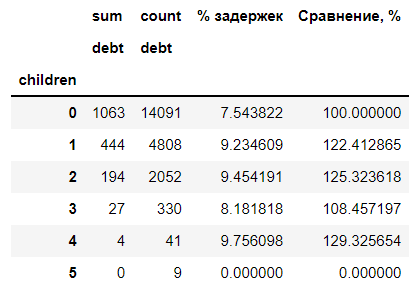

- Заемщики без детей показывают самый низкий процент задержки выплат - **7.54%**. 
- Наличие детей увеличивает вероятность задержки выплаты до **9.45%**, что более чем на 20% больше, чем у группы без детей. 
- Данные для заемщиков с 4-5 детьми не стоит учитывать из-за очень малого объема данных в этих группах.

#### Влияние семейного положения
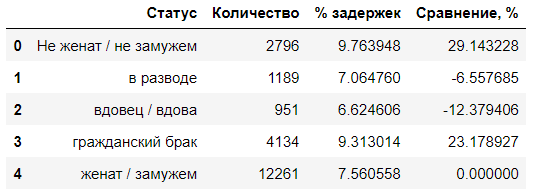

Семейное положение явно влияет на возврат кредита в срок.

- Якорная часть выборки - семейные люди, вероятно еще без детей, судя по предыдущему исследованию. Процент невозврата **7.56%**, что ниже среднего по выборке. Данная категория мною выбрана как база для сравнения.

- Люди, не вступившие в официальный брак чаще других - **9.76%** - не возвращаю кредиты во время, скорее всего это связано с маленьким жизненным опытом - недооценка своих возможностей по возвращению кредита. К этой категории я причисляю и гражданский брак  - **9.31%** -  в виду отсутствия официального оформления отношений. По сравнению с семейными людьми они задерживают платежи на 23-29% чаще.

- Умудренные опытом люди после брака наиболее ответственно подходят к получению и выплате кредита - процент задержек минимальный: **6,62%** у вдовцов и **7,06%** у разведенных. Такая группа людей наименее рисковая для банка


